### Insights and Recommendations
* Derive insights from sentiment and themes
* visualize results
* recommend app improvements.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the cleaned dataset 

In [4]:
df=pd.read_csv("../data/processed/bank_reviews_with_themes.csv")
df.head(3)

,review_id,review,rating,date,bank,source,sentiment_label,sentiment_score,clean_review,topic,theme
0,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-28,Commercial Bank of Ethiopia,Google Play Store,POSITIVE,0.998468,this application is very important and advanta...,1,General Praise / Mixed Feedback
1,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-28,Commercial Bank of Ethiopia,Google Play Store,NEGATIVE,0.999132,why didnt work this app,1,General Praise / Mixed Feedback
2,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-28,Commercial Bank of Ethiopia,Google Play Store,POSITIVE,0.999696,the app makes our life easier thank you cbe,1,General Praise / Mixed Feedback


#### Identify Drivers and  Pain Points 

In [6]:
# aggregate data with sentiment per bank
bank_sentiment = df.groupby('bank')['sentiment_score'].mean().reset_index()
print(bank_sentiment)

                          bank  sentiment_score
0            Bank of Abyssinia         0.981128
1  Commercial Bank of Ethiopia         0.982912
2                  Dashen Bank         0.985280


In [10]:
# aggregate data with bank and topic
bank_sentiment_topic = df.groupby(['bank','theme'])['sentiment_score'].mean().reset_index()
print(bank_sentiment_topic)

                           bank                                theme  \
0             Bank of Abyssinia          Bugs / Issues / Reliability   
1             Bank of Abyssinia            Ease of Use / Performance   
2             Bank of Abyssinia      General Praise / Mixed Feedback   
3             Bank of Abyssinia  Positive Feedback / UI Appreciation   
4             Bank of Abyssinia       User Experience / App Features   
5   Commercial Bank of Ethiopia          Bugs / Issues / Reliability   
6   Commercial Bank of Ethiopia            Ease of Use / Performance   
7   Commercial Bank of Ethiopia      General Praise / Mixed Feedback   
8   Commercial Bank of Ethiopia  Positive Feedback / UI Appreciation   
9   Commercial Bank of Ethiopia       User Experience / App Features   
10                  Dashen Bank          Bugs / Issues / Reliability   
11                  Dashen Bank            Ease of Use / Performance   
12                  Dashen Bank      General Praise / Mixed Feed

#### Visualization

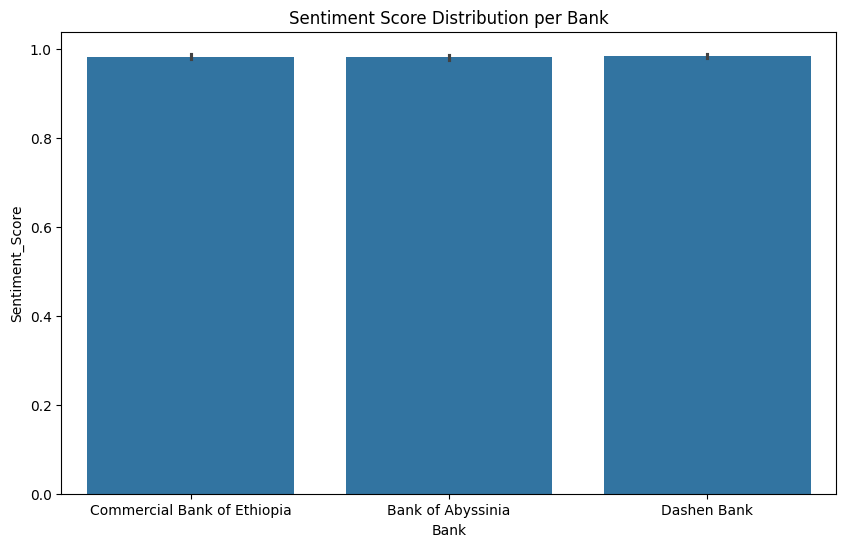

In [12]:
# sentiment per bank visualization
plt.figure(figsize=(10,6))
sns.barplot(x='bank',y='sentiment_score',data=df)
plt.title('Sentiment Score Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Sentiment_Score')
plt.show()

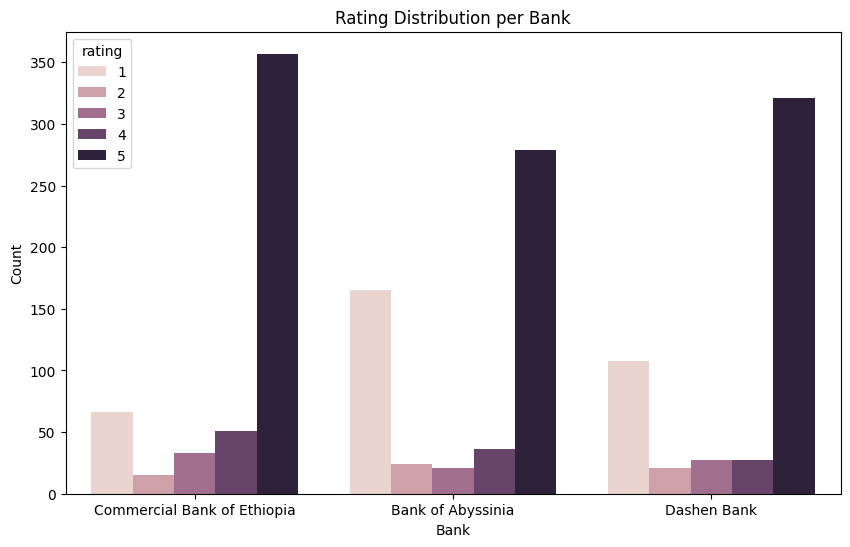

In [13]:
# Rating Distribution per Bank
plt.figure(figsize=(10,6))
sns.countplot(x='bank',hue='rating',data=df)
plt.title('Rating Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.show()

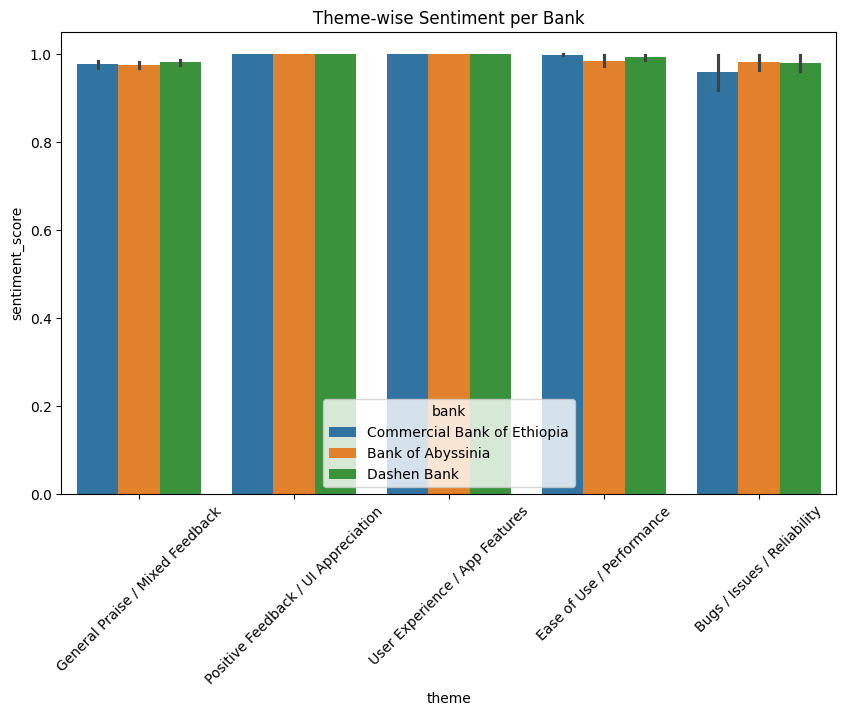

In [15]:
#theme wise sentiment analysis visualization
plt.figure(figsize=(10,6))
sns.barplot(x="theme", y="sentiment_score", hue="bank", data=df)
plt.xticks(rotation=45)
plt.title("Theme-wise Sentiment per Bank")
plt.show()


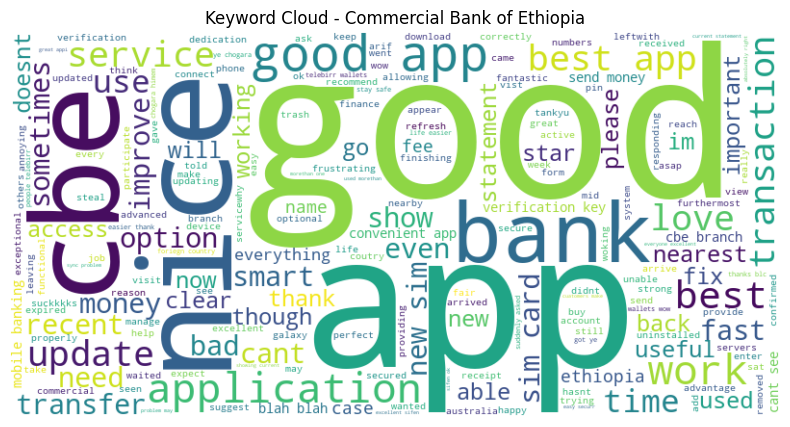

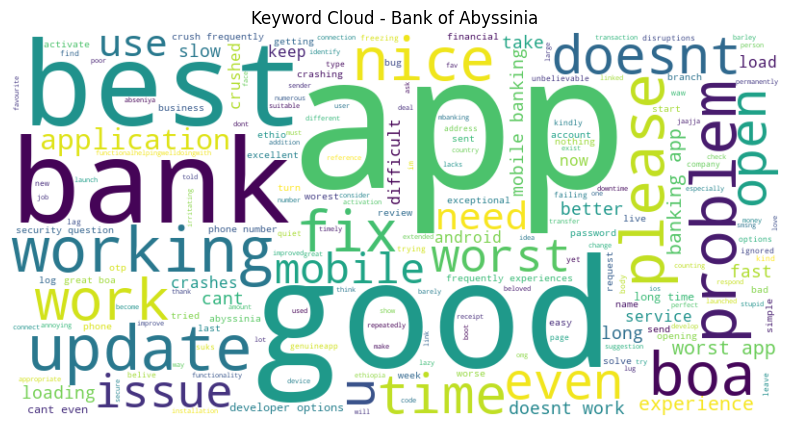

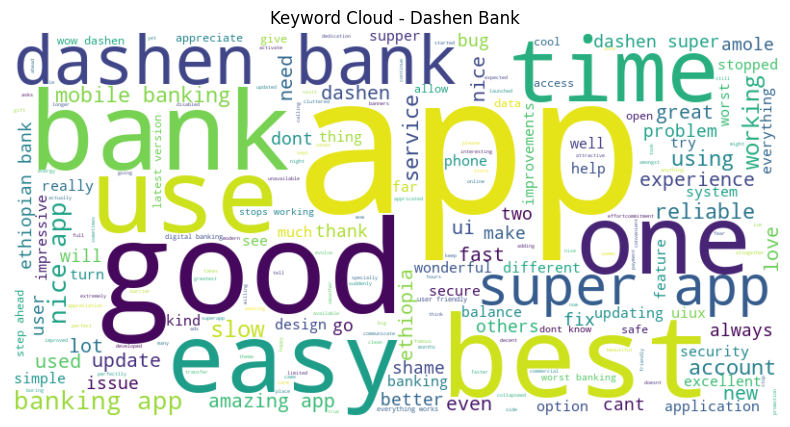

In [16]:
# key word clouds
from wordcloud import WordCloud

for bank in df["bank"].unique():
    text = " ".join(df[df["bank"]==bank]["clean_review"].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Keyword Cloud - {bank}")
    plt.show()